In [30]:
import tensorflow as tf
import pandas as pd
import os

In [135]:
print(tf.version.VERSION)

2.16.2


In [4]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [10]:
base_dir = './fruits-360/Training/'

In [14]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./225,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    validation_split=0.1,
    fill_mode='nearest')

train_generator = datagen.flow_from_directory(base_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, subset='training')

Found 60952 images belonging to 131 classes.


In [18]:
print(train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
    f.write(labels)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

In [50]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# transfer_learning
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [52]:
base_model.trainable = False

In [54]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [58]:
epochs = 10

history = model.fit(train_generator, 
                    epochs=epochs, 
                    steps_per_epoch=200
                    # workers=4, use_multiprocessing=True, max_queue_size=10
                   )

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-06 17:21:16.983274: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 7 of 8
2024-07-06 17:21:18.373755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


200/200 ━━━━━━━━━━━━━━━━━━━━ 786s 4s/step - accuracy: 0.1245 - loss: 4.1494
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 675s 3s/step - accuracy: 0.6839 - loss: 1.1243
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 676s 3s/step - accuracy: 0.8302 - loss: 0.5540
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 684s 3s/step - accuracy: 0.8753 - loss: 0.4062
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 514s 3s/step - accuracy: 0.8903 - loss: 0.3324
Epoch 6/10


2024-07-06 18:16:30.218228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


200/200 ━━━━━━━━━━━━━━━━━━━━ 715s 4s/step - accuracy: 0.9087 - loss: 0.2840
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 721s 4s/step - accuracy: 0.9180 - loss: 0.2505
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 776s 4s/step - accuracy: 0.9269 - loss: 0.2344
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 684s 3s/step - accuracy: 0.9320 - loss: 0.2117
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 527s 3s/step - accuracy: 0.9402 - loss: 0.1929


2024-07-06 19:13:33.298872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


<Axes: >

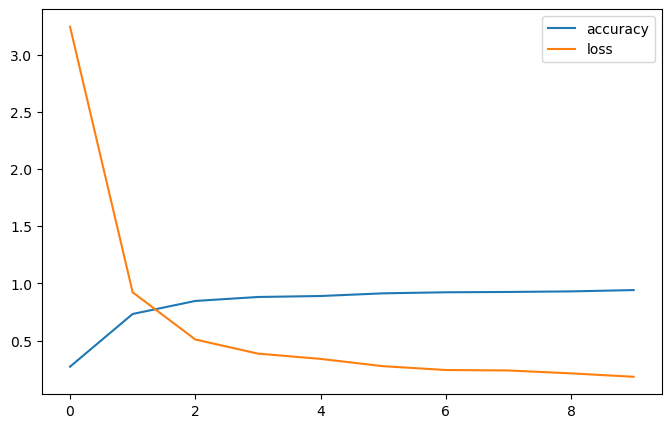

In [75]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1)
# plt.show()

In [65]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 32)       │       368,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 131)            │         4,323 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,376,971 (12.88 MB)

 Trainable params: 372,995 (1.42 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 745,992 (2.85 MB)

In [77]:
# Evaluate the model - Implementar depois

# loss, acc = model.evaluate(test_images, verbose=2)
# print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

AttributeError: 'NoneType' object has no attribute 'shape'

In [125]:
import pickle as pickle

In [181]:
# salvando o aquivo localhost
saved_mode_dir = 'my_model.keras'
#model.save('meu_modelo.h5')
model.save(saved_mode_dir)

# Carregar o modelo Keras salvo
# loaded_model = tf.keras.models.load_model('my_model.keras')

#tf.keras.saving.save_model(model, 'my_model_2.keras')

#tf.keras.saving.save_model(model, 'my_model.keras', saving=)

#tf.keras.saving.save_model(model, saving=saved_mode_dir)
# Assuming you have already trained and created a model called 'model'
#tf.keras.saving.save_model(model, saving="path_to_save_model.h5")

#export_dir = '.'
#tf.saved_model.save(model, saved_mode_dir)


In [185]:

loaded_model = tf.keras.models.load_model(saved_mode_dir)

# Carregando arquivo Keras
#loaded_model = tf.keras.models.load_model(saved_mode_dir)

# Converter o modelo Keras para o formato TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Salvar o modelo convertido em um arquivo
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# converter = tf.lite.TFLiteConverter.from_keras_model('my_model.keras')
# tflite_model = converter.convert()

# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

ValueError: Exception encountered when calling Conv2D.call().

[1mKernel shape must have the same length as input, but received kernel of shape (3, 3, (None, 7, 7, 1280), 32) and input of shape [(None, 7, 7, 1280)].[0m

Arguments received by Conv2D.call():
  • args=(['<KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, name=keras_tensor_2227>'],)
  • kwargs=<class 'inspect._empty'>